### Com base no módulo que acabamos de ver, analise a base de dados disponibilizada e extraia:
- Tipos de dados disponíveis (X)
- Período da análise feita (X)
- Tamanho da base de dados (X)
- Verificar dados nulos
- Outliers

##

In [2]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np

In [3]:
df_top10 = pd.read_csv('netflix_daily_top_10.csv')
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
display(df_top10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [5]:
# Com isso sabemos o período que a análise foi feita
df_top10['As of'] = pd.to_datetime(df_top10['As of'])
primeira_analise = df_top10['As of'].min()
ultima_analise = df_top10['As of'].max()
duracao = ultima_analise - primeira_analise
print(f"Período analisado: {primeira_analise.strftime('%d/%m/%Y')} até {ultima_analise.strftime('%d/%m/%Y')}, ou seja, a duração da análise foi de {duracao.days} dias ")

Período analisado: 01/04/2020 até 11/03/2022, ou seja, a duração da análise foi de 709 dias 


In [6]:
# Com isso sabemos o tamanho da base de dados
print(f"O DataFrame possui {df_top10.shape[0]} linhas e {df_top10.shape[1]} colunas")

O DataFrame possui 7100 linhas e 10 colunas


In [7]:
# - Com isso verificamos dados nulos
df_top10.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [8]:
df_top10['Netflix Exclusive'].unique()
# Não existem dados nulos, ele deixou em branco os que não são exclusivos netflix

array(['Yes', nan], dtype=object)

In [9]:
# Outliers 
# Analisando as informações estatísticas (apenas colunas numéricas)
df_top10.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


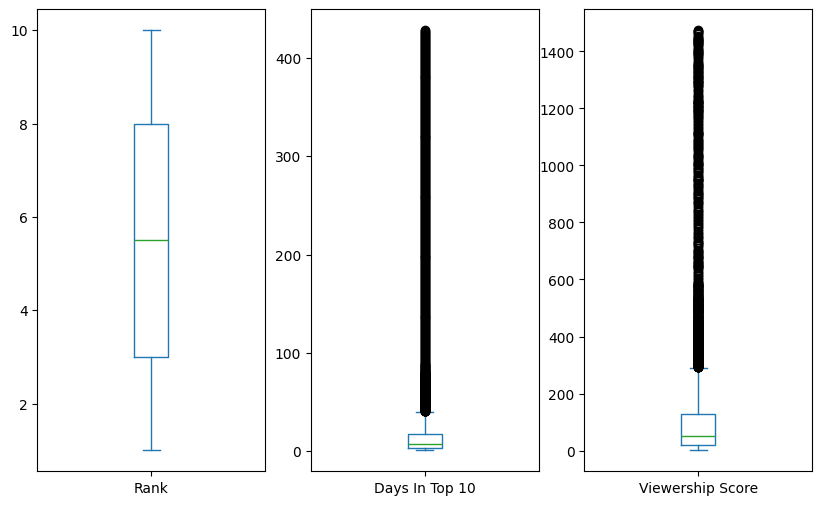

In [10]:
df_top10.plot(kind='box',figsize=(10,6),subplots=True); 

<Axes: ylabel='Frequency'>

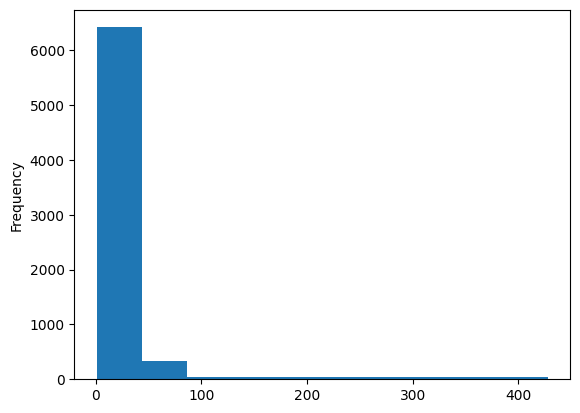

In [11]:
df_top10['Days In Top 10'].plot.hist()

<Axes: ylabel='Frequency'>

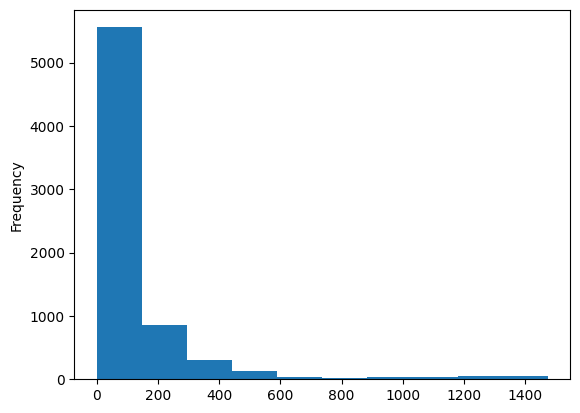

In [12]:
df_top10['Viewership Score'].plot.hist()

In [13]:
# Nenhum tem distribuição normal
# Método de Tukey - IQR (Distribuição não normal)
# IQR - Range InterQuartil
# IQR = 3⁰ quartil - 1⁰ quartil
q1_daysInTop10 = df_top10['Days In Top 10'].quantile(0.25)
q3_daysInTop10 = df_top10['Days In Top 10'].quantile(0.75)
iqr_daysInTop10 = q3_daysInTop10 - q1_daysInTop10
iqr_daysInTop10

# Limite Superior
limitSup_daysInTop10 = q3_daysInTop10 + (iqr_daysInTop10 * 1.5)
limitSup_daysInTop10


np.float64(40.5)

In [22]:
df_top10[(df_top10['Days In Top 10'] > limitSup_daysInTop10)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [ ]:
outliers_daysInTop10 = df_top10[(df_top10['Days In Top 10'] > limitSup_daysInTop10)]
outliers_daysInTop10.groupby(['Title'])['Title'].count()

Title
All American             26
Bridgerton               18
Cobra Kai                41
Cocomelon               388
Emily in Paris            8
Ginny & Georgia           4
Love is Blind             6
Lucifer                  17
Maid                      9
Manifest                 40
Outer Banks              32
Ozark                    49
Shameless                 2
Squid Game               26
Sweet Magnolias           5
The Queen of Flow         4
The Queenâs Gambit     33
The Witcher               5
Tiger King                4
Too Hot to Handle         7
Virgin River             15
Who Killed Sara?          2
iCarly                    2
Name: Title, dtype: int64

In [15]:

q1_Viewership_Score = df_top10['Viewership Score'].quantile(0.25)
q3_Viewership_Score = df_top10['Viewership Score'].quantile(0.75)
iqr_Viewership_Score = q3_Viewership_Score - q1_Viewership_Score
iqr_Viewership_Score

# Limite Superior
limitSup_Viewership_Score = q3_Viewership_Score + (iqr_Viewership_Score * 1.5)
limitSup_Viewership_Score

np.float64(291.5)

In [16]:
df_top10[(df_top10['Viewership Score'] > limitSup_Viewership_Score)]


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
236,2020-04-24,7,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",32,292
247,2020-04-25,8,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",33,295
255,2020-04-26,6,8,3,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",34,300
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",35,301
2382,2020-11-25,3,2,3,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",33,296
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6,3,Sweet Magnolias,TV Show,Yes,"May 19, 2020",45,344
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [24]:
outliers_Viewership_Score = df_top10[(df_top10['Viewership Score'] > limitSup_Viewership_Score)]
outliers_Viewership_Score.groupby(['Title'])['Title'].count()

Title
All American                     24
Bridgerton                       26
Cobra Kai                        42
Cocomelon                       327
Ginny & Georgia                  13
Love is Blind                     4
Lucifer                          19
Maid                              7
Manifest                         50
Outer Banks                      31
Ozark                            38
Squid Game                       36
Sweet Magnolias                   9
The Queenâs Gambit             41
Tiger King                        7
Tiger King: Murder, Mayhem …      6
Too Hot to Handle                 2
Virgin River                     16
Name: Title, dtype: int64